# Importing and working with data in python

Machine learning requires working with data. In order to work with data, we need to learn how to import and visualize it. For this example, we will be working with housing data for King county.

To get started we import some modules. The first two we are familiar with from the previous notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The next module we import is especially good for working with data.

In [2]:
import pandas as pd

Next, we'll upload our data to be attached to this notebook. Go to the left column where the paperclip is and click on it. There is a blue 'upload' button on the bottom right of the tab that should have opened – click on it, navigate to where you've downloaded your kc_house_data file, and upload the data!

Now we import the data from the file 'kc_house_data.csv' using pandas.

In [3]:
data = pd.read_csv('Admission_Predict.csv')

What does the data look like? Let's get a bit of a rundown:

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In your own words, describe what you think each of the data variables (columns) represents?

Answer: 

How many rows and columns do we have? We can use the .shape command to find this out.

In [5]:
data.shape

(500, 9)

Plot one of the variables vs. another, on a scatter plot. What does this plot represent?

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

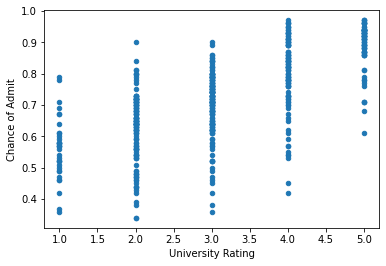

In [6]:
data.plot(kind='scatter', x='University Rating', y='Chance of Admit')

Create scatter plots below for 
1. GRE score vs. Chance of Admission
2. TOEFL score vs. Chance of Admission
3. LOR vs. Chance of Admission
4. CGPA vs. Chance of Admission
5. Anything else you can think of?

For each of the above examples, what do they tell you?

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

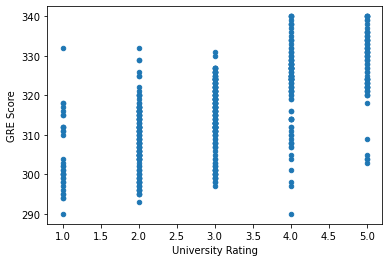

In [7]:
data.plot(kind='scatter', x='University Rating', y='GRE Score')

<AxesSubplot:xlabel='University Rating', ylabel='TOEFL Score'>

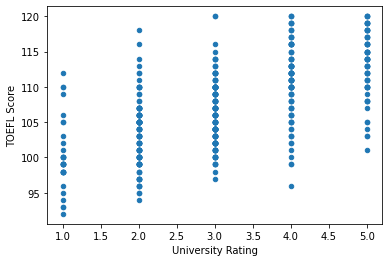

In [8]:
data.plot(kind='scatter', x='University Rating', y='TOEFL Score')

<AxesSubplot:xlabel='University Rating', ylabel='LOR'>

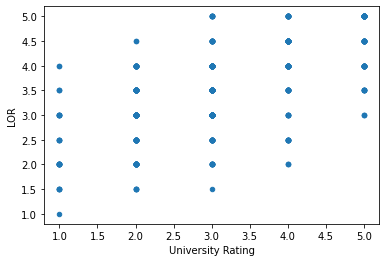

In [9]:
data.plot(kind='scatter', x='University Rating', y='LOR')

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

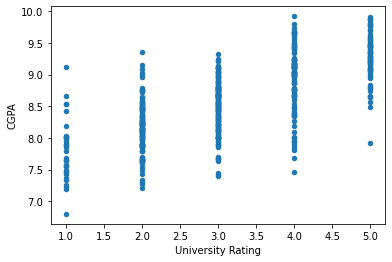

In [10]:
data.plot(kind='scatter', x='University Rating', y='CGPA')

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

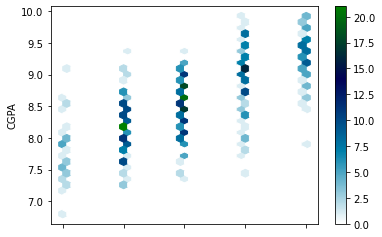

In [11]:
data.plot(kind='hexbin', x='University Rating', y='CGPA', gridsize=30, cmap='ocean_r')

In [12]:
CGPA_std = data.groupby('University Rating').CGPA.std()
CGPA_avg = data.groupby('University Rating').CGPA.mean()
CGPA_med = data.groupby('University Rating').CGPA.median()
CGPA_skew = data.groupby('University Rating').CGPA.skew()

CGPA_stats = pd.merge(CGPA_std, CGPA_avg, on='University Rating')
CGPA_stats = pd.merge(CGPA_stats, CGPA_med, on='University Rating')
CGPA_stats = pd.merge(CGPA_stats, CGPA_skew, on='University Rating')
CGPA_stats.columns = ['CGPA_std', 'CGPA_avg', 'CGPA_med', 'CGP_skew']
CGPA_stats['SD1+'] = CGPA_stats['CGPA_std'] + CGPA_stats['CGPA_avg']
CGPA_stats['SD1-'] =  CGPA_stats['CGPA_avg'] - CGPA_stats['CGPA_std']
CGPA_stats['SD2+'] = 2*CGPA_stats['CGPA_std'] + CGPA_stats['CGPA_avg']
CGPA_stats['SD2-'] =  CGPA_stats['CGPA_avg'] - 2*CGPA_stats['CGPA_std']
CGPA_stats['SD3+'] = 3*CGPA_stats['CGPA_std'] + CGPA_stats['CGPA_avg']
CGPA_stats['SD3-'] =  CGPA_stats['CGPA_avg'] - 3*CGPA_stats['CGPA_std']
CGPA_stats

/Users/laurenkoulias/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CGPA_x'} in the result is deprecated and will raise a MergeError in a future version.
  


,CGPA_std,CGPA_avg,CGPA_med,CGP_skew,SD1+,SD1-,SD2+,SD2-,SD3+,SD3-
University Rating,,,,,,,,,,
1,0.476338,7.798529,7.740,0.644848,8.274867,7.322192,8.751205,6.845854,9.227543,6.369516
2,0.398619,8.177778,8.170,0.134965,8.576397,7.779158,8.975017,7.380539,9.373636,6.981920
3,0.406011,8.500123,8.545,-0.425115,8.906134,8.094113,9.312145,7.688102,9.718156,7.282091
4,0.510288,8.936667,9.020,-0.649898,9.446954,8.426379,9.957242,7.916091,10.467530,7.405803
5,0.381075,9.278082,9.300,-0.732928,9.659158,8.897007,10.040233,8.515931,10.421309,8.134856


<AxesSubplot:xlabel='University Rating'>

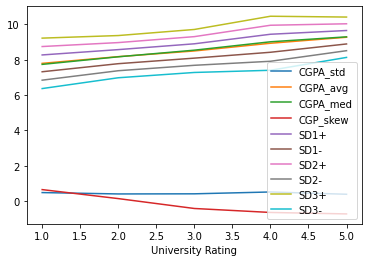

In [13]:
CGPA_stats.plot()

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

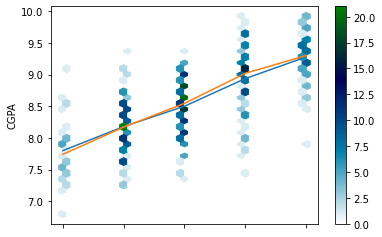

In [14]:
data.plot(kind='hexbin', x='University Rating', y='CGPA', gridsize=30, cmap='ocean_r')
data.groupby('University Rating').CGPA.mean().plot()
data.groupby('University Rating').CGPA.median().plot()

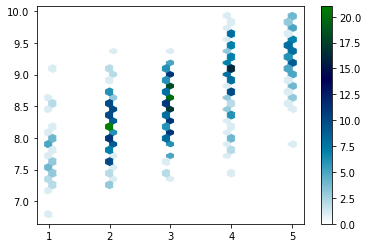

In [15]:
plt.hexbin(data['University Rating'], data['CGPA'], gridsize=30, cmap='ocean_r')

plt.colorbar() 

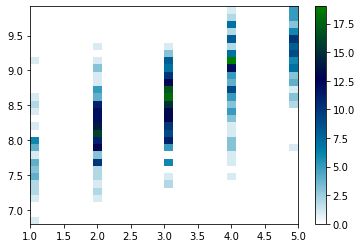

In [16]:
plt.hist2d(data['University Rating'], data['CGPA'], bins=(30,30), cmap='ocean_r')
plt.colorbar() 

![](https://miro.medium.com/max/1838/1*IdGgdrY_n_9_YfkaCh-dag.png)

In [17]:
CGPA_q3m = np.array(data.groupby('University Rating').CGPA.quantile(0.0214))
CGPA_q2m = np.array(data.groupby('University Rating').CGPA.quantile(0.1359))
CGPA_q1m = np.array(data.groupby('University Rating').CGPA.quantile(0.3413))
CGPA_q1p = np.array(data.groupby('University Rating').CGPA.quantile(0.8413))
CGPA_q2p = np.array(data.groupby('University Rating').CGPA.quantile(0.9763))
CGPA_q3p = np.array(data.groupby('University Rating').CGPA.quantile(0.9977))

In [18]:
CGPA_std = np.array(data.groupby('University Rating').CGPA.std())
CGPA_avg = np.array(data.groupby('University Rating').CGPA.mean())
CGPA_med = np.array(data.groupby('University Rating').CGPA.median())
CGPA_skew = np.array(data.groupby('University Rating').CGPA.skew())

print(CGPA_skew)


[ 0.6448476   0.13496512 -0.42511486 -0.64989823 -0.73292812]


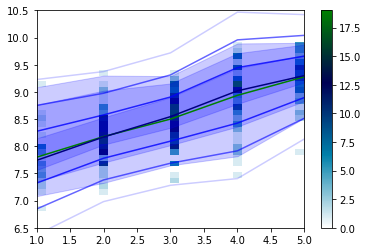

In [22]:
plt.subplots()
plt.hist2d(data['University Rating'], data['CGPA'], bins=(30,30), cmap='ocean_r')

plt.fill_between([1,2,3,4,5], CGPA_q3m, CGPA_q3p, alpha=0.2, color='blue')
plt.fill_between([1,2,3,4,5], CGPA_q2m, CGPA_q2p, alpha=0.2, color='blue')
plt.fill_between([1,2,3,4,5], CGPA_q1m, CGPA_q1p, alpha=0.2, color='blue')

plt.plot([1,2,3,4,5], CGPA_avg, color='green')
plt.plot([1,2,3,4,5], CGPA_med, color='navy')

plt.plot([1,2,3,4,5], CGPA_avg-CGPA_std, color='blue', alpha=0.8)
plt.plot([1,2,3,4,5], CGPA_avg+CGPA_std, color='blue', alpha=0.8)

plt.plot([1,2,3,4,5], CGPA_avg-2*CGPA_std, color='blue', alpha=0.6)
plt.plot([1,2,3,4,5], CGPA_avg+2*CGPA_std, color='blue', alpha=0.6)

plt.plot([1,2,3,4,5], CGPA_avg-3*CGPA_std, color='blue', alpha=0.2)
plt.plot([1,2,3,4,5], CGPA_avg+3*CGPA_std, color='blue', alpha=0.2)


plt.ylim([6.5,10.5])
#plt.plot(CGPA_stats)
plt.colorbar()

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

TypeError: alpha must be numeric or None, not <class 'list'>

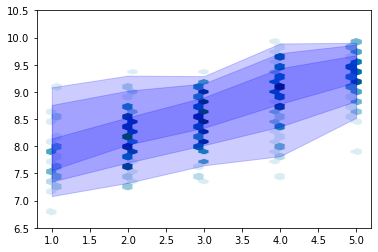

In [20]:
plt.subplots()
plt.hexbin(data['University Rating'], data['CGPA'], gridsize=30, cmap='ocean_r')

plt.fill_between([1,2,3,4,5], CGPA_q3m, CGPA_q3p, alpha=0.2, color='blue')
plt.fill_between([1,2,3,4,5], CGPA_q2m, CGPA_q2p, alpha=0.2, color='blue')
plt.fill_between([1,2,3,4,5], CGPA_q1m, CGPA_q1p, alpha=0.2, color='blue')
plt.ylim([6.5,10.5])
plt.plot(CGPA_stats, color='blue', alpha=[0.6, 0.8, 1])
plt.colorbar()

In [ ]:
data.groupby('University Rating').CGPA.quantile(0.0214).plot()
data.groupby('University Rating').CGPA.quantile(0.1359).plot()
data.groupby('University Rating').CGPA.quantile(0.3413).plot()
data.groupby('University Rating').CGPA.quantile(0.5).plot()
data.groupby('University Rating').CGPA.quantile(0.8413).plot()
data.groupby('University Rating').CGPA.quantile(0.9763).plot()
data.groupby('University Rating').CGPA.quantile(0.9977).plot()

data.groupby('University Rating').CGPA.mean().plot()
data.groupby('University Rating').CGPA.median().plot()

data.plot(kind='hexbin', x='University Rating', y='CGPA', gridsize=30, cmap='ocean_r')